#### Sleep Health and Lifestyle 

In the data we are considering the following Dataset Columns:
*Person ID: An identifier for each individual.
*Gender: The gender of the person (Male/Female).
*Age: The age of the person in years.
*Occupation: The occupation or profession of the person.
*Sleep Duration (hours): The number of hours the person sleeps per day.
*Quality of Sleep (scale: 1-10): A subjective rating of the quality of sleep, ranging from 1 to 10.
*Physical Activity Level (minutes/day): The number of minutes the person engages in physical activity daily.
*Stress Level (scale: 1-10): A subjective rating of the stress level experienced by the person, ranging from 1 to 10.
*BMI Category: The BMI category of the person (e.g., Underweight, Normal, Overweight).
*Blood Pressure (systolic/diastolic): The blood pressure measurement of the person, indicated as systolic pressure over diastolic pressure.
*Heart Rate (bpm): The resting heart rate of the person in beats per minute.
*Daily Steps: The number of steps the person takes per day.
*Sleep Disorder: The presence or absence of a sleep disorder in the person (None, Insomnia, Sleep Apnea).

#### Loading and preparing the data

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import RandomForestClassifier  
from sklearn.metrics import accuracy_score, classification_report

In [3]:

# Loading the dataset
df = pd.read_csv('Sleep_health_and_lifestyle_dataset.csv')

# Display first few rows of the DataFrame
df.head()

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
0,1,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,NaN
1,2,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN
2,3,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN
3,4,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
4,5,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea


In [4]:
df.columns = df.columns.str.strip()

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 374 entries, 0 to 373
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Person ID                374 non-null    int64  
 1   Gender                   374 non-null    object 
 2   Age                      374 non-null    int64  
 3   Occupation               374 non-null    object 
 4   Sleep Duration           374 non-null    float64
 5   Quality of Sleep         374 non-null    int64  
 6   Physical Activity Level  374 non-null    int64  
 7   Stress Level             374 non-null    int64  
 8   BMI Category             374 non-null    object 
 9   Blood Pressure           374 non-null    object 
 10  Heart Rate               374 non-null    int64  
 11  Daily Steps              374 non-null    int64  
 12  Sleep Disorder           155 non-null    object 
dtypes: float64(1), int64(7), object(5)
memory usage: 38.1+ KB


**Checking the shape of the data**

In [6]:
print(df.shape)

(374, 13)


**Checking data types**

In [7]:
print(df.dtypes)

Person ID                    int64
Gender                      object
Age                          int64
Occupation                  object
Sleep Duration             float64
Quality of Sleep             int64
Physical Activity Level      int64
Stress Level                 int64
BMI Category                object
Blood Pressure              object
Heart Rate                   int64
Daily Steps                  int64
Sleep Disorder              object
dtype: object


**Checking for missing values**

In [8]:
print(df.isnull())

     Person ID  Gender    Age  Occupation  Sleep Duration  Quality of Sleep  \
0        False   False  False       False           False             False   
1        False   False  False       False           False             False   
2        False   False  False       False           False             False   
3        False   False  False       False           False             False   
4        False   False  False       False           False             False   
..         ...     ...    ...         ...             ...               ...   
369      False   False  False       False           False             False   
370      False   False  False       False           False             False   
371      False   False  False       False           False             False   
372      False   False  False       False           False             False   
373      False   False  False       False           False             False   

     Physical Activity Level  Stress Level  BMI Cat

#### Data Preprocessing

**Categorical columns**

In [9]:
df["Age"].unique()

array([27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43,
       44, 45, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59],
      dtype=int64)

In [10]:
for col in df.columns:
    try:
        df[col].astype(float)
    except ValueError as e:
        print(f"Error converting {col}: {e}")


Error converting Gender: could not convert string to float: 'Male'
Error converting Occupation: could not convert string to float: 'Software Engineer'
Error converting BMI Category: could not convert string to float: 'Overweight'
Error converting Blood Pressure: could not convert string to float: '126/83'
Error converting Sleep Disorder: could not convert string to float: 'Sleep Apnea'


In [11]:
df["BMI Category"].unique()

array(['Overweight', 'Normal', 'Obese', 'Normal Weight'], dtype=object)

In [12]:
df["BMI Category"] = df["BMI Category"].str.replace("Normal Weight",'Normal')

In [13]:
df["BMI Category"].unique()

array(['Overweight', 'Normal', 'Obese'], dtype=object)

In [14]:
# Ensure 'BMI Category' is converted properly
df["BMI Category"] = df["BMI Category"].replace({'Normal': 0, 'Overweight': 1, 'Obese': 2}).fillna(0).astype(int)

# One-hot encode 'Occupation'
df_encoded = pd.get_dummies(df, columns=['Occupation'], prefix='Occupation', drop_first=True)

# Verify all the other columns are numeric, if not convert them
df_encoded = df_encoded.apply(pd.to_numeric, errors='coerce').fillna(0)

print(df_encoded.dtypes)  # Check to ensure all columns are numeric


Person ID                            int64
Gender                             float64
Age                                  int64
Sleep Duration                     float64
Quality of Sleep                     int64
Physical Activity Level              int64
Stress Level                         int64
BMI Category                         int32
Blood Pressure                     float64
Heart Rate                           int64
Daily Steps                          int64
Sleep Disorder                     float64
Occupation_Doctor                     bool
Occupation_Engineer                   bool
Occupation_Lawyer                     bool
Occupation_Manager                    bool
Occupation_Nurse                      bool
Occupation_Sales Representative       bool
Occupation_Salesperson                bool
Occupation_Scientist                  bool
Occupation_Software Engineer          bool
Occupation_Teacher                    bool
dtype: object


C:\Users\Elechiguerra\AppData\Local\Temp\ipykernel_4612\3250044605.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df["BMI Category"] = df["BMI Category"].replace({'Normal': 0, 'Overweight': 1, 'Obese': 2}).fillna(0).astype(int)


In [15]:
df["Sleep Disorder"].unique()

array([nan, 'Sleep Apnea', 'Insomnia'], dtype=object)

In [16]:
# Sleep Disorder

# Replace NaN values with 0
df["Sleep Disorder"] = df["Sleep Disorder"].fillna(0)

# Replace 'Sleep Apnea' with 1 and 'Insomnia' with 2
df["Sleep Disorder"] = df["Sleep Disorder"].replace({'Sleep Apnea': 1, 'Insomnia': 2})

# Convert any remaining values that weren't mapped to integers
df["Sleep Disorder"] = df["Sleep Disorder"].apply(lambda x: 0 if pd.isna(x) else x)



C:\Users\Elechiguerra\AppData\Local\Temp\ipykernel_4612\4129349486.py:7: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df["Sleep Disorder"] = df["Sleep Disorder"].replace({'Sleep Apnea': 1, 'Insomnia': 2})


In [17]:

# Replace 'Female' with 0 and 'Male' with 1
df["Gender"] = df["Gender"].map({'Female': 0, 'Male': 1})

# Convert any remaining NaNs to 0
df["Gender"] = df["Gender"].apply(lambda x: 0 if pd.isna(x) else x)



In [18]:
# Split the "Blood Pressure" column into two numerical columns
df[['Systolic_BP', 'Diastolic_BP']] = df['Blood Pressure'].str.split('/', expand=True)

# Convert them to integers
df['Systolic_BP'] = df['Systolic_BP'].astype(int)
df['Diastolic_BP'] = df['Diastolic_BP'].astype(int)

# Drop the original "Blood Pressure" column
df.drop(columns=['Blood Pressure'], inplace=True)


In [19]:
df["Occupation"].unique()

array(['Software Engineer', 'Doctor', 'Sales Representative', 'Teacher',
       'Nurse', 'Engineer', 'Accountant', 'Scientist', 'Lawyer',
       'Salesperson', 'Manager'], dtype=object)

Columns deleted. Not so relevant to our model

In [20]:
# Drop the 'Occupation' column
df.drop(columns=['Occupation'], inplace=True)

# Now perform one-hot encoding for any other categorical columns if needed
df_encoded = pd.get_dummies(df, drop_first=True)  # One-hot encode remaining categorical columns, if any

# Ensure all boolean columns are converted to int
for col in df_encoded.select_dtypes(include='bool').columns:
    df_encoded[col] = df_encoded[col].astype(int)
    
# Fill any NaN values just in case
df_encoded = df_encoded.fillna(0)

# Verify that all columns are numeric
print(df_encoded.dtypes)

# Drop the original "Blood Pressure" column
df.drop(columns=['Blood Pressure'], inplace=True)

# Drop the original "Sleep Disorder" column
df.drop(columns=['Sleep Disorder'], inplace=True)

# Drop index column this one was directly executed in our .pkl
df.drop(columns=['Index'], inplace=True)


Person ID                    int64
Gender                       int64
Age                          int64
Sleep Duration             float64
Quality of Sleep             int64
Physical Activity Level      int64
Stress Level                 int64
BMI Category                 int32
Heart Rate                   int64
Daily Steps                  int64
Sleep Disorder               int64
Systolic_BP                  int32
Diastolic_BP                 int32
dtype: object


**Columns checkup**

In [23]:
# Display all current columns and their unique values
for col in df.select_dtypes(include='bool').columns:
    print(f"{col}: {df[col].unique()}")
    
# Check unique values in remaining categorical columns if needed
for col in df.select_dtypes(include='object').columns:
    print(f"{col}: {df[col].unique()}")


In [24]:
print(df.head())
print(df.describe())


   Person ID  Gender  Age  Sleep Duration  Quality of Sleep  \
0          1       1   27             6.1                 6   
1          2       1   28             6.2                 6   
2          3       1   28             6.2                 6   
3          4       1   28             5.9                 4   
4          5       1   28             5.9                 4   

   Physical Activity Level  Stress Level  BMI Category  Heart Rate  \
0                       42             6             1          77   
1                       60             8             0          75   
2                       60             8             0          75   
3                       30             8             2          85   
4                       30             8             2          85   

   Daily Steps  Sleep Disorder  Systolic_BP  Diastolic_BP  
0         4200               0          126            83  
1        10000               0          125            80  
2        10000      

In [25]:
# Double check for missing values
print(df.isnull().sum())


Person ID                  0
Gender                     0
Age                        0
Sleep Duration             0
Quality of Sleep           0
Physical Activity Level    0
Stress Level               0
BMI Category               0
Heart Rate                 0
Daily Steps                0
Sleep Disorder             0
Systolic_BP                0
Diastolic_BP               0
dtype: int64


#### EDA

In [26]:
# Confirm all columns are numeric
df_encoded = df_encoded.apply(pd.to_numeric, errors='coerce')

# Fill any NaN values that may have been introduced
df_encoded = df_encoded.fillna(0)


array([[<Axes: title={'center': 'Person ID'}>,
        <Axes: title={'center': 'Gender'}>,
        <Axes: title={'center': 'Age'}>,
        <Axes: title={'center': 'Sleep Duration'}>],
       [<Axes: title={'center': 'Quality of Sleep'}>,
        <Axes: title={'center': 'Physical Activity Level'}>,
        <Axes: title={'center': 'Stress Level'}>,
        <Axes: title={'center': 'BMI Category'}>],
       [<Axes: title={'center': 'Heart Rate'}>,
        <Axes: title={'center': 'Daily Steps'}>,
        <Axes: title={'center': 'Sleep Disorder'}>,
        <Axes: title={'center': 'Systolic_BP'}>],
       [<Axes: title={'center': 'Diastolic_BP'}>, <Axes: >, <Axes: >,
        <Axes: >]], dtype=object)

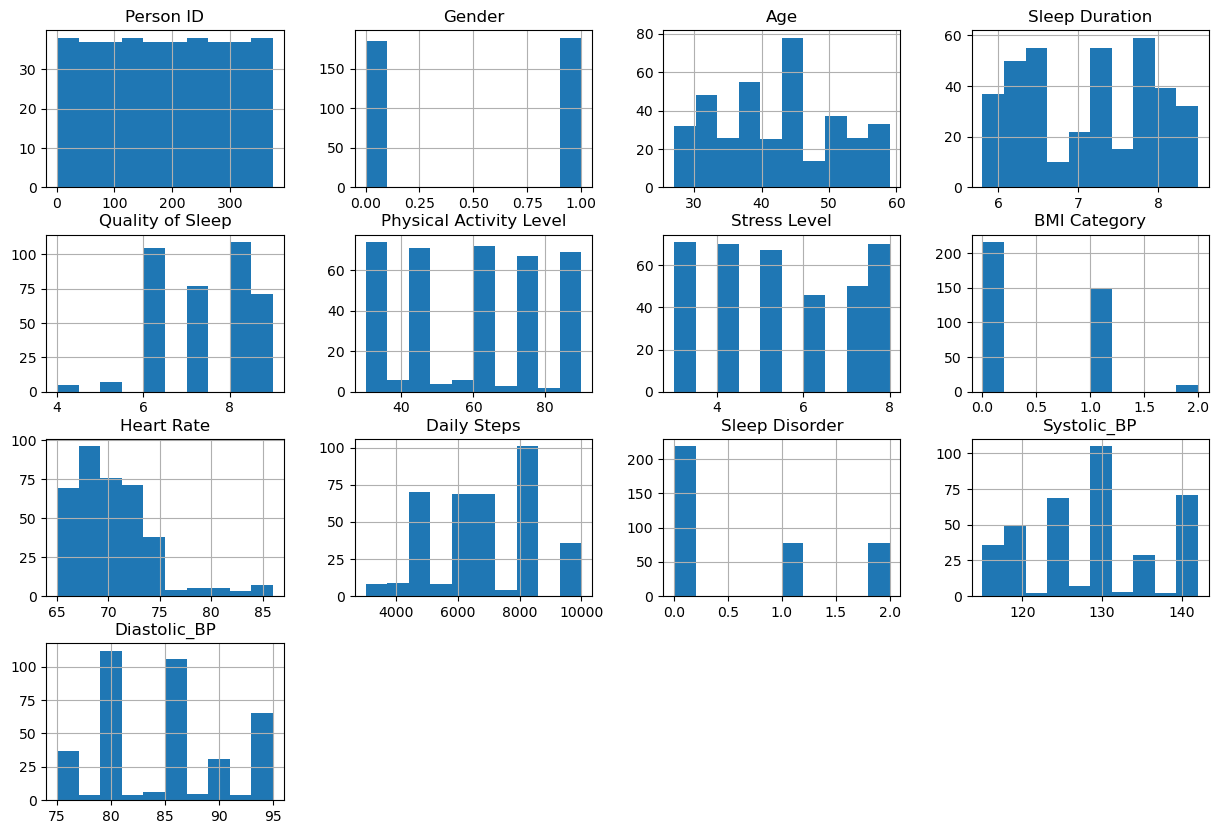

In [25]:
df.hist(bins=10, figsize=(15, 10))


<Axes: >

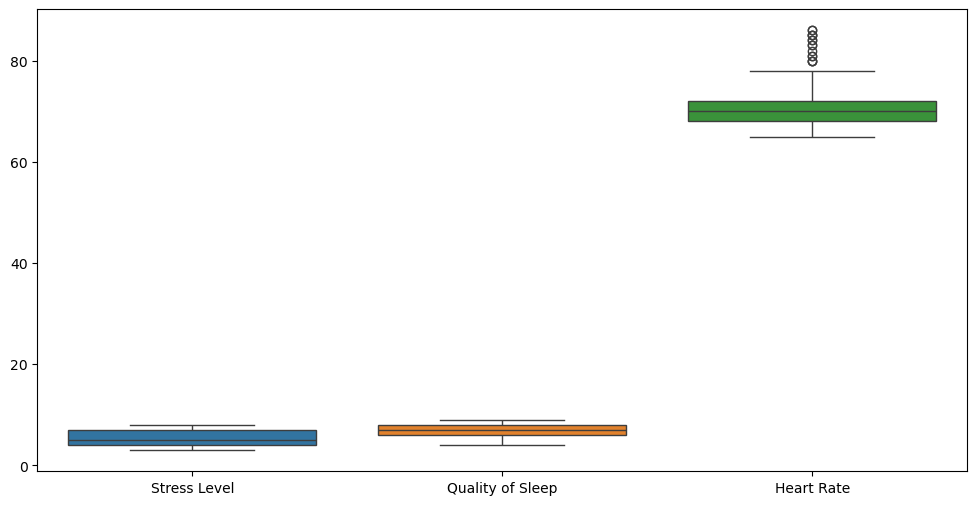

In [26]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
sns.boxplot(data=df[['Stress Level', 'Quality of Sleep', 'Heart Rate']])


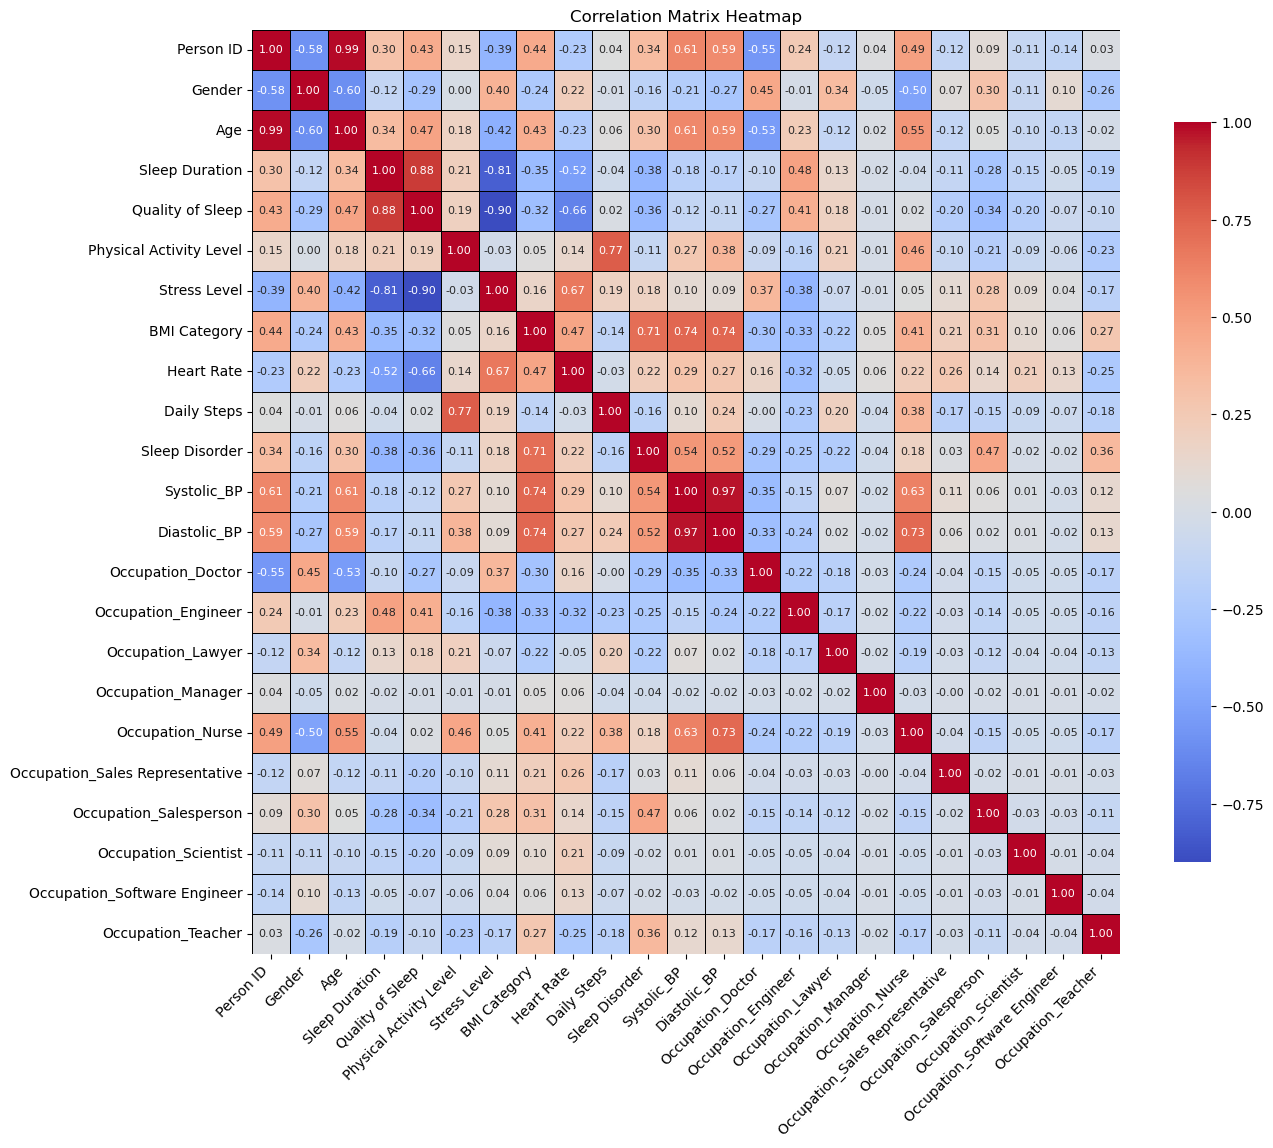

In [27]:
import matplotlib.pyplot as plt
import seaborn as sns

# Correlation matrix
correlation_matrix = df_encoded.corr()

plt.figure(figsize=(14, 12))

# Heatmap
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", 
            annot_kws={"size": 8}, cbar_kws={"shrink": .8}, 
            linewidths=.5, linecolor='black')

# Rotate the x-axis labels for better readability
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.yticks(fontsize=10)
plt.title('Correlation Matrix Heatmap')

plt.show()


#### Feature Engineering

**Normalizing Numerical Features:**

In [28]:
from sklearn.preprocessing import StandardScaler
numerical_features = ['Age', 'Sleep Duration', 'Quality of Sleep', 'Physical Activity Level', 
                      'Stress Level', 'Heart Rate', 'Daily Steps', 'BMI Category', 
                      'Systolic_BP', 'Diastolic_BP']
scaler = StandardScaler()
df[numerical_features] = scaler.fit_transform(df[numerical_features])


**Creating Interaction Terms:**

In [29]:
df['Sleep_Stress_Interaction'] = df['Sleep Duration'] * df['Stress Level']

**Discretizing Continuous Variables:**

In [30]:
df['Age_binned'] = pd.cut(df['Age'], bins=[0, 18, 35, 60, 100], labels=['Child', 'Young Adult', 'Adult', 'Senior'])


**Create Aggregate Features:**

In [31]:
df['Average_Sleep_Quality'] = df[['Sleep Duration', 'Quality of Sleep']].mean(axis=1)
df['Total_Physical_Activity'] = df['Daily Steps'] + df['Physical Activity Level']


**Lag Features:**

In [32]:
df['Lagged_Sleep_Duration'] = df['Sleep Duration'].shift(1)
df['Lagged_Stress_Level'] = df['Stress Level'].shift(1)


**Polynomial Features:**

In [33]:
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(degree=2, include_bias=False)
poly_features = poly.fit_transform(df[numerical_features])
poly_df = pd.DataFrame(poly_features, columns=poly.get_feature_names_out(numerical_features))
df = pd.concat([df, poly_df], axis=1)

**Defining your features and target:**

In [34]:
# Define features and target
X = df.drop('Stress Level', axis=1)
y = df['Stress Level']

# Splitting the data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


**Gradient Boosting Regressor:**

In [35]:
print(y_train.shape)

(299, 2)


In [36]:
from sklearn.ensemble import GradientBoostingRegressor

# Defining the target
X = df_encoded.drop('Stress Level', axis=1)
y = df_encoded['Stress Level']

# Split data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the Gradient Boosting Regressor
gbr = GradientBoostingRegressor(n_estimators=100, random_state=42)
gbr.fit(X_train, y_train)


GradientBoostingRegressor(random_state=42)

In [37]:
# Select top features based on importance
feature_importances = gbr.feature_importances_
top_features_idx = np.argsort(feature_importances)[-10:]  # Indices of top 10 features
top_features_names = X_train.columns[top_features_idx]  # Assuming X_train is a DataFrame
top_features_importances = feature_importances[top_features_idx]

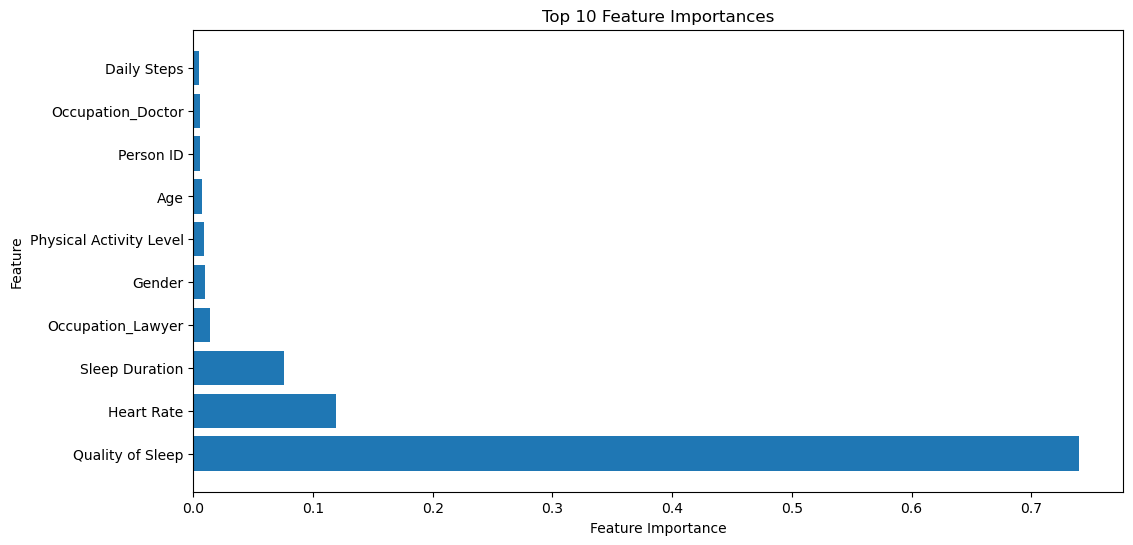

In [38]:
# Plot the Top features based on importance

import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.barh(top_features_names, top_features_importances)
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.title('Top 10 Feature Importances')
plt.gca().invert_yaxis()  # Invert y-axis to have the most important feature on top
plt.show()


#### Model Evaluation

**Cross-Validation**

In [39]:
from sklearn.model_selection import KFold, cross_val_score

# Initialize KFold
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Calculate cross-validated RMSE
cv_scores = cross_val_score(gbr, X, y, cv=kf, scoring='neg_root_mean_squared_error')

# Take the absolute values of the negative scores
cv_rmse = -cv_scores

print(f"Cross-validated RMSE scores: {cv_rmse}")
print(f"Mean RMSE: {cv_rmse.mean()}")



Cross-validated RMSE scores: [0.08145372 0.28956    0.32657131 0.15707768 0.27119296]
Mean RMSE: 0.2251711327824677


**Changing of model (our first model was unfitted)**

In [ ]:
from sklearn.model_selection import StratifiedShuffleSplit, cross_val_score

# Calculate cross-validated scores (assuming it's a classification problem)
cv_scores = cross_val_score(gbr, X, y, cv=5, scoring='neg_root_mean_squared_error')

# Take the absolute values of the negative scores
cv_rmse = -cv_scores

print(f"Cross-validated RMSE scores: {cv_rmse}")
print(f"Mean RMSE: {cv_rmse.mean()}")

#### Model Tuning

**Hyperparameter Tuning:**

In [40]:
from sklearn.model_selection import GridSearchCV

# Define parameter grid
param_grid = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 4, 5]
}

# Initialize GridSearchCV and fitting it
grid_search = GridSearchCV(estimator=gbr, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1, error_score='raise')
grid_search.fit(X_train, y_train)

# Best parameters
best_params = grid_search.best_params_
print("Best parameters found: ", best_params)

# Update model with best parameters
gbr_best = GradientBoostingRegressor(**best_params)
gbr_best.fit(X_train, y_train)


Best parameters found:  {'learning_rate': 0.1, 'max_depth': 4, 'n_estimators': 200}


GradientBoostingRegressor(max_depth=4, n_estimators=200)

**Changing of model (our first model was unfitted)**

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
"""
# Define parameter grid
param_grid = {
    'n_estimators': [50, 1000],
    'learning_rate': [0.01, 0.1, 0.2, 0.3, 0.4, 0.5],
    'max_depth': [3, 4, 5, 6, 7, 8, 9, 10]
}
"""

grid = {"n_estimators": [int(x) for x in np.linspace(start = 200, stop = 2000, num = 1000)],
        "learning_rate": [x for x in np.linspace(start = 0.1, stop = 1.0, num = 100)],
        "max_depth":[int(x) for x in np.linspace(start=1, stop=100, num = 100)]}

# Initialize RandomizedSearchCV and fitting it
random_search = RandomizedSearchCV(estimator=gbr, n_iter=100, param_distributions=grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1, error_score='raise')
random_search.fit(X_train, y_train)

# Best parameters
best_params = random_search.best_params_
print("Best parameters found: ", best_params)

# Update model with best parameters
gbr_best = GradientBoostingRegressor(**best_params)
gbr_best.fit(X_train, y_train)

#### Imbalanced Data Handling

In [41]:
from sklearn.utils import resample

# Combine X_train and y_train for resampling
train_data = pd.concat([X_train, y_train], axis=1)

# Sample the class with the highest count as majority class for balance
majority_class_count = train_data['Stress Level'].value_counts().max()
majority_class = train_data[train_data['Stress Level'] == 4]  # Adjust based on your data

# Upsample each class to match the majority class count
balanced_classes = []
for label in train_data['Stress Level'].unique():
    class_samples = train_data[train_data['Stress Level'] == label]
    class_samples_upsampled = resample(class_samples, 
                                       replace=True, 
                                       n_samples=majority_class_count, 
                                       random_state=42)
    balanced_classes.append(class_samples_upsampled)

# Combine all upsampled classes into a new training dataset
train_data_balanced = pd.concat(balanced_classes)

# Separate X and y from the balanced training data
X_train_balanced = train_data_balanced.drop('Stress Level', axis=1)
y_train_balanced = train_data_balanced['Stress Level']

# Verify new class distribution
print(y_train_balanced.value_counts())



Stress Level
7    60
8    60
5    60
3    60
6    60
4    60
Name: count, dtype: int64


**Adapting to our new model**

In [ ]:
# Combine X_train and y_train for resampling
train_data = pd.concat([X_train, y_train], axis=1)

# Check class distribution
print(train_data['Stress Level'].value_counts())

In [ ]:
from sklearn.utils import resample

# Combine X_train and y_train for resampling
train_data = pd.concat([X_train, y_train], axis=1)

# Sample the class with the highest count as majority class for balance
majority_class_count = train_data['Stress Level'].value_counts().max()
majority_class = train_data[train_data['Stress Level'] == 4]  # Adjust based on your data

# Upsample each class to match the majority class count
balanced_classes = []
for label in train_data['Stress Level'].unique():
    class_samples = train_data[train_data['Stress Level'] == label]
    class_samples_upsampled = resample(class_samples, 
                                       replace=True, 
                                       n_samples=majority_class_count, 
                                       random_state=42)
    balanced_classes.append(class_samples_upsampled)

# Combine all upsampled classes into a new training dataset
train_data_balanced = pd.concat(balanced_classes)

# Separate X and y from the balanced training data
X_train_balanced = train_data_balanced.drop('Stress Level', axis=1)
y_train_balanced = train_data_balanced['Stress Level']

# Verify new class distribution
print(y_train_balanced.value_counts())

**Proceeding with Model Training:**

In [42]:
from sklearn.metrics import mean_squared_error, root_mean_squared_error

# Predict on the test set
y_pred = gbr.predict(X_test)

# Evaluate the model
rmse = root_mean_squared_error(y_test, y_pred)
print(f"Root Mean Squared Error: {rmse}")


Root Mean Squared Error: 0.08145371830426937


**Missing values**

In [ ]:
from sklearn.metrics import root_mean_squared_error, mean_absolute_error, r2_score

# Predict on the test set
y_pred = gbr_best.predict(X_test)

# Evaluate the model
rmse = root_mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"Mean Absolute Error (MAE): {mae}")
print(f"R-squared (R^2): {r2}")

** Normalizing and the Ensemble method made our model slow and deleting them made our model faster and more accurate**

**Ensemble Methods**

In [43]:
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, VotingClassifier
rf = RandomForestClassifier(n_estimators=100)
gbr = GradientBoostingClassifier(n_estimators=100)
ensemble = VotingClassifier(estimators=[('rf', rf), ('gbr', gbr)], voting='soft')
ensemble.fit(X_train, y_train)


VotingClassifier(estimators=[('rf', RandomForestClassifier()),
                             ('gbr', GradientBoostingClassifier())],
                 voting='soft')

#### Model Interpretation

**Feature Importance**

In [ ]:
from sklearn.impute import SimpleImputer
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error

# Define features and target
X = df.drop('Stress Level', axis=1)
y = df['Stress Level']

# Split data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Impute missing values
imputer = SimpleImputer(strategy='mean')
X_train_imputed = imputer.fit_transform(X_train)
X_test_imputed = imputer.transform(X_test)

# Train the Gradient Boosting Regressor
gbr = GradientBoostingRegressor(n_estimators=100, random_state=42)
gbr.fit(X_train_imputed, y_train)

# Predict on the test set
y_pred = gbr.predict(X_test_imputed)

# Evaluate the model
rmse = mean_squared_error(y_test, y_pred, squared=False)
print(f"Root Mean Squared Error: {rmse}")


In [ ]:
# Get feature importances
feature_importances = gbr.feature_importances_
features = X_train.columns

# Create a DataFrame
importance_df = pd.DataFrame({'Feature': features, 'Importance': feature_importances})

# Sort by importance
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Plot feature importances
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
plt.barh(importance_df['Feature'], importance_df['Importance'])
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importances')
plt.show()


What we actually used:

In [ ]:
#our Trained model

from sklearn.metrics import root_mean_squared_error, mean_absolute_error, r2_score

# Predict on the test set
y_pred = gbr_best.predict(X_test)

# Evaluate the model
rmse = root_mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"Mean Absolute Error (MAE): {mae}")
print(f"R-squared (R^2): {r2}")

In [ ]:
# Predictions

nuevos_datos = pd.DataFrame({
    'Gender': [1],
    'Age': [30],
    'Sleep Duration': [8.0],
    'Quality of Sleep': [2.0],
    'Physical Activity Level': [0],
    'BMI Category': [1],
    'Heart Rate': [110],
    'Daily Steps': [8000],
    'Sleep Disorder': [1],
    'Systolic_BP': [120],
    'Diastolic_BP': [80]
})

# Asegúrate de que los datos de entrada tengan las mismas columnas que el conjunto de entrenamiento
nuevos_datos = nuevos_datos[X_train.columns]

# Realizar la predicción
prediccion = gbr_best.predict(nuevos_datos)

print(f"Predicción del nivel de estrés: {prediccion[0].round()}")

**Streamlit**
We created a new pickle notebool with our best model, without the split, with the entire data.

We deleted the column index directly from the pickle notebook

In [ ]:
import pickle
with open('model.pkl', 'wb') as file:
    pickle.dump(model, file)

In [ ]:
import streamlit as st
import pickle  # or joblib
import numpy as np

# Load the trained model
def load_model():
    with open('model.pkl', 'rb') as file:
        model = pickle.load(file)
    return model

model = load_model()

# Title and description
st.title("Sleep Health Prediction App")
st.write("Input your details to predict sleep-related outcomes.")

# Input features for the model
age = st.slider('Age', 18, 90, 25)  # Change the range as per your dataset
gender = st.selectbox('Gender', ['Male', 'Female'])  # Use categorical encoding in preprocessing
occupation = st.text_input('Occupation')
sleep_duration = st.number_input('Sleep Duration (hours)', 0.0, 12.0, 6.0)
physical_activity = st.slider('Physical Activity (minutes/day)', 0, 300, 30)
stress_level = st.slider('Stress Level (1-10)', 1, 10, 5)
heart_rate = st.number_input('Heart Rate (bpm)', 40, 180, 75)
daily_steps = st.number_input('Daily Steps', 0, 30000, 5000)

# Button to trigger prediction
if st.button("Predict"):
    # Prepare the input data for the model
    input_data = np.array([[age, sleep_duration, physical_activity, stress_level, heart_rate, daily_steps]])
    
    # Prediction
    prediction = model.predict(input_data)
    
    # Display prediction
    st.write(f"Predicted Outcome: {prediction}")


In [ ]:
streamlit run app.py